In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving first_500000_rows.csv to first_500000_rows.csv


In [3]:
df = pd.read_csv('/content/first_500000_rows.csv')

In [4]:
column_data = df['dealer_final_value']

print(column_data)


0         24
1         18
2         22
3         18
4         20
          ..
499995    17
499996    19
499997    18
499998    22
499999    20
Name: dealer_final_value, Length: 500000, dtype: object


In [5]:
# Remove any leading/trailing whitespace
column_data = column_data.str.strip()

# Replace any non-numeric characters with empty string
column_data = column_data.str.replace('[^0-9]', '', regex=True)

# Convert to numeric (will result in NaN for values that cannot be converted)
column_data = pd.to_numeric(column_data, errors='coerce')

# Optionally, you can fill NaN values with a specific value (e.g., 0)
# column_data = column_data.fillna(0)

print(column_data)


0         24.0
1         18.0
2         22.0
3         18.0
4         20.0
          ... 
499995    17.0
499996    19.0
499997    18.0
499998    22.0
499999    20.0
Name: dealer_final_value, Length: 500000, dtype: float64


In [6]:
column_data_2 = df['player_final_value']

print(column_data_2)

0         ['BJ']
1           [21]
2           [13]
3           [18]
4           [26]
           ...  
499995      [17]
499996      [14]
499997      [17]
499998      [12]
499999      [20]
Name: player_final_value, Length: 500000, dtype: object


In [7]:
column_data_2 = column_data_2.str.strip()

column_data_2 = column_data_2.str.replace('[^0-9]', '', regex=True)

column_data_2 = pd.to_numeric(column_data_2, errors='coerce')


print(column_data_2)

0          NaN
1         21.0
2         13.0
3         18.0
4         26.0
          ... 
499995    17.0
499996    14.0
499997    17.0
499998    12.0
499999    20.0
Name: player_final_value, Length: 500000, dtype: float64


In [8]:
# Explore column_data
print(column_data.describe())  # Summary statistics
print(column_data.isnull().sum())  # Count of missing values
print(column_data.value_counts())  # Frequency of unique values

# Explore column_data_2
print(column_data_2.describe())  # Summary statistics
print(column_data_2.isnull().sum())  # Count of missing values
print(column_data_2.value_counts())  # Frequency of unique values

count    476524.000000
mean         20.333702
std           2.580619
min          17.000000
25%          18.000000
50%          20.000000
75%          22.000000
max          26.000000
Name: dealer_final_value, dtype: float64
23476
dealer_final_value
20.0    90743
18.0    70539
19.0    68263
17.0    66475
21.0    37607
22.0    36761
23.0    32760
24.0    28748
25.0    24386
26.0    20242
Name: count, dtype: int64
count    4.761030e+05
mean     8.535148e+03
std      3.803095e+05
min      4.000000e+00
25%      1.600000e+01
50%      1.800000e+01
75%      2.000000e+01
max      2.625252e+07
Name: player_final_value, dtype: float64
23897
player_final_value
20.0        78186
17.0        54348
19.0        54072
18.0        51040
15.0        34856
            ...  
181320.0        1
171215.0        1
2415.0          1
192012.0        1
211916.0        1
Name: count, Length: 1151, dtype: int64


In [9]:
# Remove rows with missing values in both columns
df_cleaned = df.dropna(subset=['dealer_final_value', 'player_final_value'])

# Explore the cleaned data
print(column_data.describe())
print(column_data.isnull().sum())
print(column_data_2.describe())
print(column_data_2.isnull().sum())

count    476524.000000
mean         20.333702
std           2.580619
min          17.000000
25%          18.000000
50%          20.000000
75%          22.000000
max          26.000000
Name: dealer_final_value, dtype: float64
23476
count    4.761030e+05
mean     8.535148e+03
std      3.803095e+05
min      4.000000e+00
25%      1.600000e+01
50%      1.800000e+01
75%      2.000000e+01
max      2.625252e+07
Name: player_final_value, dtype: float64
23897


In [10]:
# Remove duplicate rows based on all columns
df_no_duplicates = df_cleaned.drop_duplicates()

# Explore the data after removing duplicates
print(df_no_duplicates.shape)  # Check the new shape


(500000, 12)


In [11]:
import numpy as np

# Calculate the IQR for both columns
Q1_dealer = column_data.quantile(0.25)
Q3_dealer = column_data.quantile(0.75)
IQR_dealer = Q3_dealer - Q1_dealer

Q1_player = column_data_2.quantile(0.25)
Q3_player = column_data_2.quantile(0.75)
IQR_player = Q3_player - Q1_player

# Define bounds for outliers
lower_bound_dealer = Q1_dealer - 1.5 * IQR_dealer
upper_bound_dealer = Q3_dealer + 1.5 * IQR_dealer

lower_bound_player = Q1_player - 1.5 * IQR_player
upper_bound_player = Q3_player + 1.5 * IQR_player

# Identify outliers
outliers_dealer = df_no_duplicates[(column_data > upper_bound_dealer) | (column_data < lower_bound_dealer)]
outliers_player = df_no_duplicates[(column_data_2 > upper_bound_player) | (column_data_2 < lower_bound_player)]

# Remove them:
df_no_outliers = df_no_duplicates[
    (column_data <= upper_bound_dealer) & (column_data >= lower_bound_dealer) &
    (column_data_2 <= upper_bound_player) & (column_data_2 >= lower_bound_player)]

# Explore the data after outlier handling
print(df_no_outliers.shape)


(441377, 12)


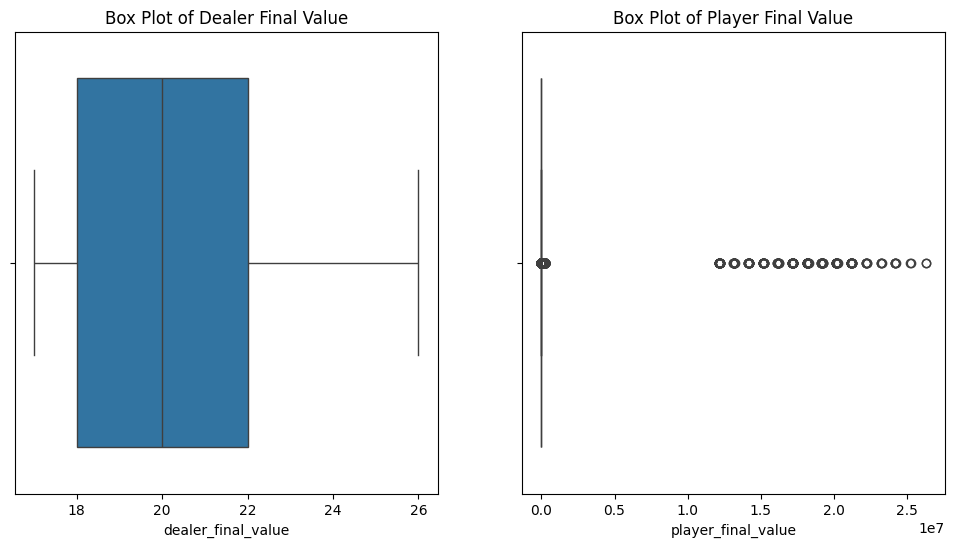

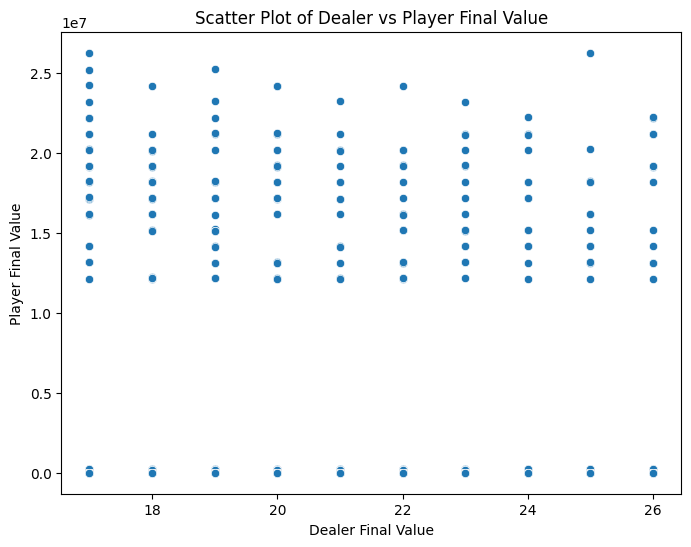

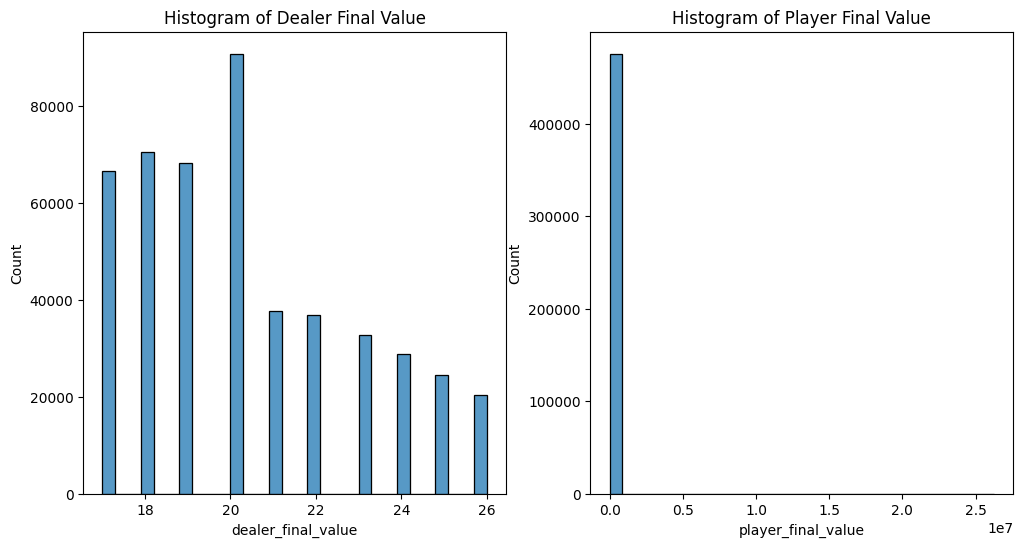

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots to visualize outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=column_data)
plt.title('Box Plot of Dealer Final Value')

plt.subplot(1, 2, 2)
sns.boxplot(x=column_data_2)
plt.title('Box Plot of Player Final Value')
plt.show()

# Scatter plot to see the relationship between the two columns and identify outliers visually
plt.figure(figsize=(8, 6))
sns.scatterplot(x=column_data, y=column_data_2)
plt.title('Scatter Plot of Dealer vs Player Final Value')
plt.xlabel('Dealer Final Value')
plt.ylabel('Player Final Value')
plt.show()

# Histogram for each column to see the distribution and potential outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(column_data, bins=30)
plt.title('Histogram of Dealer Final Value')

plt.subplot(1, 2, 2)
sns.histplot(column_data_2, bins=30)
plt.title('Histogram of Player Final Value')
plt.show()


In [13]:
# Iterate through columns and infer data types
for column in df_cleaned.columns:
  try:
    # Try converting to numeric
    df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='ignore')
  except:
    pass  # If not numeric, leave as is

# Print the data types of each column after conversion
print(df_cleaned.dtypes)


shoe_id                 int64
cards_remaining         int64
dealer_up               int64
initial_hand           object
dealer_final           object
dealer_final_value     object
player_final           object
player_final_value     object
actions_taken          object
run_count               int64
true_count              int64
win                   float64
dtype: object


<ipython-input-13-50b7b761c77e>:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='ignore')


In [14]:
new_column_names = {
    'dealer_final_value': 'Dealer_Final_Value',
    'player_final_value': 'Player_Final_Value'
}

df_cleaned = df_cleaned.rename(columns=new_column_names)

print(df_cleaned.columns)


Index(['shoe_id', 'cards_remaining', 'dealer_up', 'initial_hand',
       'dealer_final', 'Dealer_Final_Value', 'player_final',
       'Player_Final_Value', 'actions_taken', 'run_count', 'true_count',
       'win'],
      dtype='object')


In [15]:
df.to_csv('cleaned_data.csv', index=False)

<ipython-input-16-e4fa877e7704>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['dealer_final_value'] = pd.to_numeric(df_no_outliers['dealer_final_value'], errors='coerce')
<ipython-input-16-e4fa877e7704>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['player_final_value'] = pd.to_numeric(df_no_outliers['player_final_value'], errors='coerce')
<ipython-input-16-e4fa877e7704>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

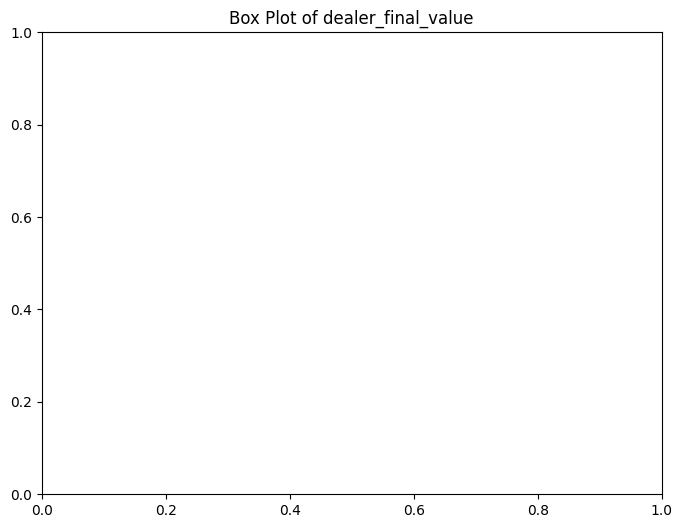

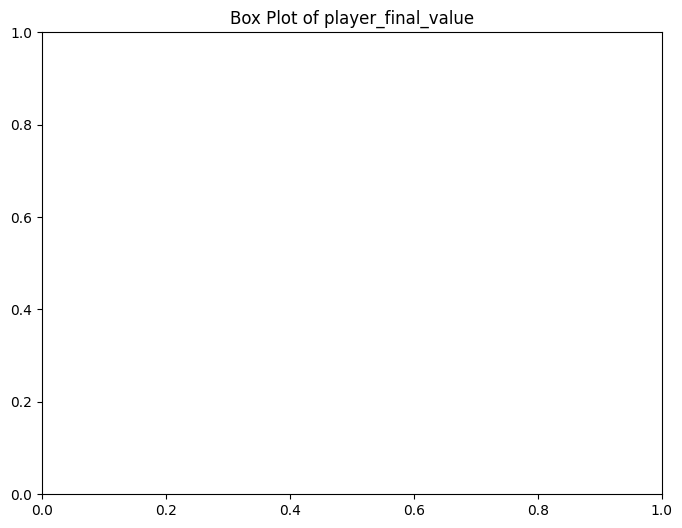

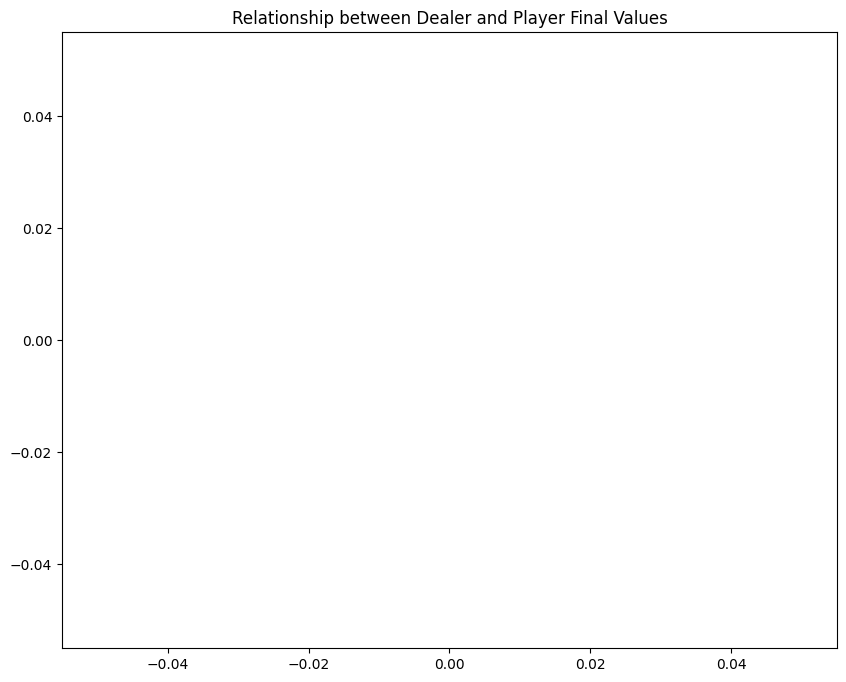

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


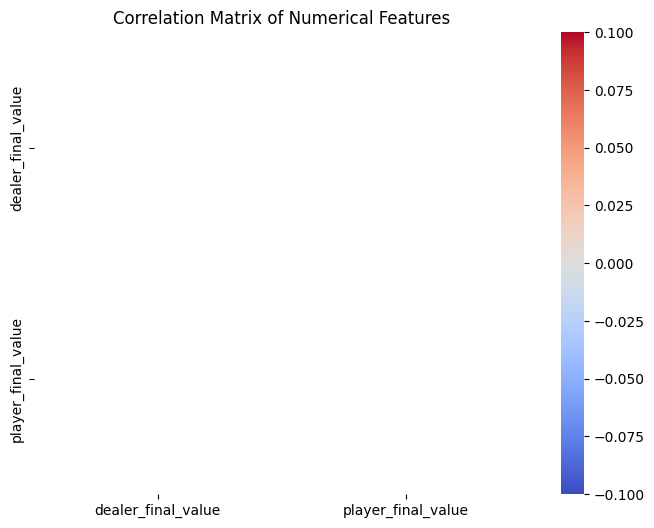

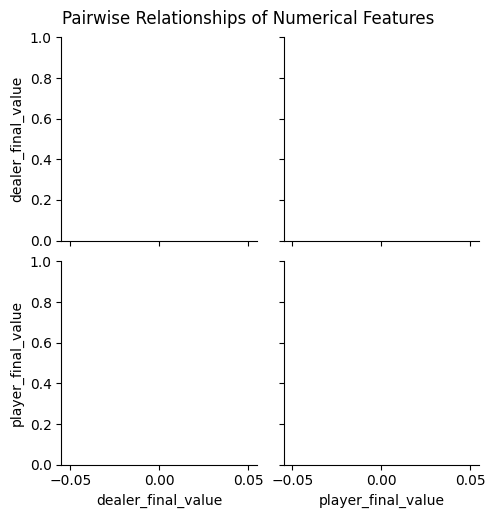

       dealer_final_value  player_final_value
count                 0.0                 0.0
mean                  NaN                 NaN
std                   NaN                 NaN
min                   NaN                 NaN
25%                   NaN                 NaN
50%                   NaN                 NaN
75%                   NaN                 NaN
max                   NaN                 NaN


In [16]:
df_no_outliers['dealer_final_value'] = pd.to_numeric(df_no_outliers['dealer_final_value'], errors='coerce')
df_no_outliers['player_final_value'] = pd.to_numeric(df_no_outliers['player_final_value'], errors='coerce')

# Histograms for numerical features
numerical_features = ['dealer_final_value', 'player_final_value']  # Original column names
for col in numerical_features:
    df_no_outliers[col] = pd.to_numeric(df_no_outliers[col], errors='coerce')

# Drop rows with missing values in the specified columns
df_no_outliers = df_no_outliers.dropna(subset=numerical_features)

# Box plots for numerical features (to visualize outliers again after cleaning)
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


# Scatter plot for the relationship between 'Dealer_Final_Value' and 'Player_Final_Value'
plt.figure(figsize=(10, 8))
# Use original column names ('dealer_final_value', 'player_final_value')
sns.scatterplot(x='dealer_final_value', y='player_final_value', data=df_no_outliers)
plt.title('Relationship between Dealer and Player Final Values')
plt.show()


# Correlation matrix (heatmap) for numerical features
numerical_df = df_no_outliers[numerical_features]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# Pairplot for numerical features (shows pairwise relationships)
sns.pairplot(numerical_df)
plt.suptitle('Pairwise Relationships of Numerical Features', y=1.02)
plt.show()


# Describe numerical features
print(df_no_outliers[numerical_features].describe())

In [17]:
df_no_outliers = df_no_outliers.rename(columns={
    'dealer_final_value': 'Dealer_Final_Value',
    'player_final_value': 'Player_Final_Value'
})

# Calculate the Pearson correlation coefficient:
correlation = df_no_outliers['Dealer_Final_Value'].corr(df_no_outliers['Player_Final_Value'], method='pearson')
print(f"Pearson Correlation Coefficient: {correlation}")

# Calculate other correlation coefficients (Spearman, Kendall) if needed
correlation_spearman = df_no_outliers['Dealer_Final_Value'].corr(df_no_outliers['Player_Final_Value'], method='spearman')
print(f"Spearman Correlation Coefficient: {correlation_spearman}")

correlation_kendall = df_no_outliers['Dealer_Final_Value'].corr(df_no_outliers['Player_Final_Value'], method='kendall')
print(f"Kendall Correlation Coefficient: {correlation_kendall}")

Pearson Correlation Coefficient: nan
Spearman Correlation Coefficient: nan
Kendall Correlation Coefficient: nan


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df_no_outliers' is your cleaned DataFrame

# 1. Creating dummy features (if needed)
# Example: If you have a categorical feature 'game_type'
# df_no_outliers = pd.get_dummies(df_no_outliers, columns=['game_type'], drop_first=True)


# 2. Scale standardization
# Select numerical features to scale (excluding dummy variables)
numerical_features = ['Dealer_Final_Value', 'Player_Final_Value'] # Example, adjust as needed
scaler = StandardScaler()

# Fit and transform the numerical features
outliers_dealer = df_no_duplicates[(column_data > upper_bound_dealer) | (column_data < lower_bound_dealer)]
outliers_player = df_no_duplicates[(column_data_2 > upper_bound_player) | (column_data_2 < lower_bound_player)]

# Instead of removing all outliers, consider capping them to the IQR bounds:
df_no_outliers = df_no_duplicates.copy()  # Create a copy to avoid modifying the original
# Ensure both columns are numeric before clipping
df_no_outliers['dealer_final_value'] = pd.to_numeric(df_no_outliers['dealer_final_value'], errors='coerce')
df_no_outliers['player_final_value'] = pd.to_numeric(df_no_outliers['player_final_value'], errors='coerce')

# Now apply np.clip
df_no_outliers['dealer_final_value'] = np.clip(df_no_outliers['dealer_final_value'], lower_bound_dealer, upper_bound_dealer)
df_no_outliers['player_final_value'] = np.clip(df_no_outliers['player_final_value'], lower_bound_player, upper_bound_player)
df_no_outliers['dealer_final_value'] = np.clip(df_no_outliers['dealer_final_value'], lower_bound_dealer, upper_bound_dealer)
df_no_outliers['player_final_value'] = np.clip(df_no_outliers['player_final_value'], lower_bound_player, upper_bound_player)

# Explore the data after outlier handling
print(df_no_outliers.shape)


# 3. Split data into training and testing subsets
# Define your features (X) and target variable (y)
X = df_no_outliers.drop(['dealer_final_value', 'player_final_value'], axis=1)
y = df_no_outliers['player_final_value']  # Assuming 'player_final_value' is your target

# Split the data (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shapes after splitting:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

(500000, 12)
Shapes after splitting:
X_train: (400000, 10)
X_test: (100000, 10)
y_train: (400000,)
y_test: (100000,)


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
def clean_column(data):
    # Convert to string and strip leading/trailing whitespace
    data = data.astype(str).str.strip()

    # Handle list-like strings:
    #   - Extract numbers from strings like '[7, 10]'
    #   - If multiple numbers, take the first one (you might need a more sophisticated strategy)
    data = data.str.replace(r'\[(.*?)\]', lambda m: m.group(1).split(',')[0], regex=True)

    # Replace remaining non-numeric characters with empty string
    data = data.str.replace(r'\D', '', regex=True)

    # Convert to numeric (will result in NaN for values that cannot be converted)
    data = pd.to_numeric(data, errors='coerce')
    return data

# Apply the function to all columns in X_train and X_test
for column in X_train.columns:
    X_train[column] = clean_column(X_train[column])
    X_test[column] = clean_column(X_test[column])

# Fill any remaining NaN values with 0 (or another appropriate strategy)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [30]:
train_data = pd.DataFrame({'X': X_train.index, 'y': y_train})  # Create a temporary DataFrame
train_data = train_data.dropna()  # Drop rows with NaN in 'y'
X_train = X_train.loc[train_data['X']]  # Update X_train
y_train = train_data['y']  # Update y_train

In [32]:
y_test_no_nan = y_test.dropna()
y_pred_linear_no_nan = y_pred_linear[y_test.notna()]  # Keep predictions corresponding to non-NaN y_test values

In [34]:
# 1. Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Before calculating the error, remove rows with NaN in y_test
y_test_no_nan = y_test.dropna()
y_pred_linear_no_nan = y_pred_linear[y_test.notna()]  # Keep predictions corresponding to non-NaN y_test values


mse_linear = mean_squared_error(y_test_no_nan, y_pred_linear_no_nan)
r2_linear = r2_score(y_test_no_nan, y_pred_linear_no_nan)

print("Linear Regression:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")

Linear Regression:
Mean Squared Error: 11.049347641871432
R-squared: 0.09237204965128887


In [36]:
# 2. Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42) # Add random_state for reproducibility
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

# Before calculating the error, handle NaN values in y_test and y_pred_tree
y_test_no_nan = y_test.dropna()  # Remove rows with NaN in y_test
y_pred_tree_no_nan = y_pred_tree[y_test.notna()]  # Keep predictions corresponding to non-NaN y_test values

mse_tree = mean_squared_error(y_test_no_nan, y_pred_tree_no_nan)  # Calculate MSE using non-NaN values
r2_tree = r2_score(y_test_no_nan, y_pred_tree_no_nan)  # Calculate R-squared using non-NaN values

print("\nDecision Tree Regression:")
print(f"Mean Squared Error: {mse_tree}")
print(f"R-squared: {r2_tree}")


Decision Tree Regression:
Mean Squared Error: 14.1903791404469
R-squared: -0.1656420950235853


In [39]:
# 3. Random Forest Regression
forest_reg = RandomForestRegressor(random_state=42, n_estimators=100) # Increased n_estimators
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)

# Before calculating the error, handle NaN values in y_test
y_test_no_nan = y_test.dropna()  # Remove rows with NaN in y_test
y_pred_forest_no_nan = y_pred_forest[y_test.notna()]  # Keep predictions corresponding to non-NaN y_test values

# Calculate MSE and R-squared using non-NaN values
mse_forest = mean_squared_error(y_test_no_nan, y_pred_forest_no_nan)
r2_forest = r2_score(y_test_no_nan, y_pred_forest_no_nan)

print("\nRandom Forest Regression:")
print(f"Mean Squared Error: {mse_forest}")
print(f"R-squared: {r2_forest}")


Random Forest Regression:
Mean Squared Error: 7.643731375474058
R-squared: 0.37212001412215323


I feel the Random Forest Regression model is the best model to use.